In [1]:
from google.drive import drive
drive.mount('/content/drive')

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("DATASETS/Mobile phone price_6thQuestion.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Brand             407 non-null    object
 1   Model             407 non-null    object
 2   Storage           407 non-null    object
 3   RAM               407 non-null    object
 4   Screen Size       407 non-null    object
 5   Camera            407 non-null    object
 6   Battery Capacity  407 non-null    int64 
 7   Price             407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [ ]:
data.head()

,Brand,Model,Storage,RAM,Screen Size,Camera,Battery Capacity,Price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [ ]:
data['Storage'] = pd.to_numeric(data['Storage'].str.replace("[^\d+]","",regex=True),errors='coerce')
data['RAM'] = pd.to_numeric(data['RAM'].str.replace("[^\d+]","",regex=True),errors='coerce')
data['Price'] = pd.to_numeric(data['Price'].str.replace("[^\d+]","",regex=True),errors='coerce')


In [ ]:
# a)	Identify the models & the price released by each brand.
print("The models & the price released by each brand are : ")
grouped_data = data[["Brand","Model","Price"]].groupby(by="Brand")
for brand, group in grouped_data:
    print("\nBrand: ",brand)
    print(group[['Model', 'Price']])

The models & the price released by each brand are : 

Brand:  Apple
                   Model  Price
0          iPhone 13 Pro    999
5              iPhone 13    799
13        iPhone 12 Mini    699
25             iPhone 11    599
32   iPhone SE (2nd Gen)    399
39             iPhone XR    499
45        iPhone 12 Mini    699
51     iPhone 11 Pro Max   1099
57     iPhone 13 Pro Max   1299
62      iPhone SE (2020)    399
68             iPhone XR    499
74             iPhone 11    599
77             iPhone 13    799
289     iPhone SE (2020)    399
297    iPhone 11 Pro Max   1099
305            iPhone 13    799
308            iPhone XR    599
318            iPhone 12    799
326            iPhone 11    699
333     iPhone SE (2020)    399
338        iPhone XS Max   1099
347        iPhone 8 Plus    699
355            iPhone XR    499
362    iPhone 11 Pro Max   1099
369       iPhone 12 mini    899
379     iPhone SE (2020)    449
384        iPhone 12 Pro    999
388            iPhone 11    749
396 

In [ ]:
# b)	Identify the correlation between Battery Capacity and price.
correlation = data['Battery Capacity'].corr(data['Price'])
print("correlation between Battery Capacity and price : ",correlation)

correlation between Battery Capacity and price :  -0.3965813764365194


In [ ]:
# c)	Find how many models are there per each Battery capacity with same price.
grp_data = data[['Model','Battery Capacity','Price']].groupby(by=["Price","Battery Capacity"])
print("no. of models : \n",grp_data.count().count())

no. of models : 
 Model    179
dtype: int64


In [ ]:
# print(data.loc[data['Brand'] == 'Vivo',"Storage"].value_counts())
data[['Brand','Storage']].groupby(by = ['Brand','Storage']).value_counts()

Brand       Storage
Apple       64         14
            128        11
            256         4
            512         1
Asus        128         3
            256         1
Blackberry  64          3
CAT         32          1
Google      128         7
Huawei      64          1
            128         4
            256         6
            512         1
LG          128         2
            256         1
Motorola    32          2
            64          7
            128        13
            256         1
Nokia       32          9
            64         10
            128         9
OnePlus     128        10
            256         5
Oppo        32          3
            64          9
            128        36
            256         8
Realme      32          6
            64         12
            128        25
Samsung     32          5
            64         11
            128        54
            256         8
            512         1
Sony        128         1
Vivo        32    

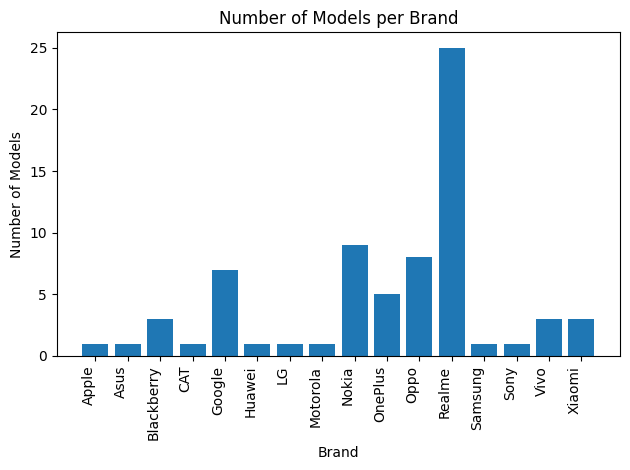

In [ ]:
# d)	Count the number of models in each brand with highest storage. Draw the graph.
import matplotlib.pyplot as plt
grp_data = data[['Brand','Storage']].groupby(by=["Brand"])
d = {}
for i,j in grp_data:
    d[i[0]] = j['Storage'][j['Storage'] == max(j['Storage'])].count()
plt.bar(d.keys(),d.values())
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.title('Number of Models per Brand')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# e)	Identify how many models are released by each brand.
grp_data = data[['Brand','Model']].groupby('Brand').nunique()
print("no. of models that are released by each brand : \n",grp_data)

no. of models that are released by each brand : 
             Model
Brand            
Apple          15
Asus            3
Blackberry      3
CAT             1
Google          4
Huawei         10
LG              3
Motorola       19
Nokia          17
OnePlus        10
Oppo           33
Realme         24
Samsung        42
Sony            1
Vivo           21
Xiaomi         33


In [ ]:
# f)	Find the RAM capacity of all models of every brand.
grp_data = data[['Brand','Model','RAM']].groupby('Brand')
# print("no. of models that are released by each brand : \n",grp_data)
for i,j in grp_data:
    print("\n\nBrand :",i)
    print(j[['Model','RAM']])



Brand : Apple
                   Model  RAM
0          iPhone 13 Pro    6
5              iPhone 13    4
13        iPhone 12 Mini    4
25             iPhone 11    4
32   iPhone SE (2nd Gen)    3
39             iPhone XR    3
45        iPhone 12 Mini    4
51     iPhone 11 Pro Max    4
57     iPhone 13 Pro Max    6
62      iPhone SE (2020)    3
68             iPhone XR    3
74             iPhone 11    4
77             iPhone 13    4
289     iPhone SE (2020)    3
297    iPhone 11 Pro Max    4
305            iPhone 13    6
308            iPhone XR    3
318            iPhone 12    4
326            iPhone 11    4
333     iPhone SE (2020)    3
338        iPhone XS Max    4
347        iPhone 8 Plus    3
355            iPhone XR    3
362    iPhone 11 Pro Max    4
369       iPhone 12 mini    4
379     iPhone SE (2020)    3
384        iPhone 12 Pro    6
388            iPhone 11    4
396            iPhone XR    3
404    iPhone 12 Pro Max    6


Brand : Asus
              Model  RAM
89   Zenfone 8

In [ ]:
# h)	Find how many models are there per each Battery capacity.
grp_data = data[['Model',"Battery Capacity"]].groupby('Battery Capacity').count()
print("no. of models per each capacity : \n",grp_data)

no. of models per each capacity : 
                   Model
Battery Capacity       
1821                  5
2227                  3
2691                  1
2800                  1
2815                  5
2942                  5
3000                  1
3095                  1
3110                  4
3174                  1
3300                  2
3340                  1
3500                  4
3687                  1
3885                  1
3969                  3
4000                 34
4025                  1
4080                  3
4100                  1
4115                  1
4160                  1
4200                  8
4230                  6
4250                  6
4300                  7
4310                 10
4350                  1
4352                  1
4400                  1
4450                  1
4470                  1
4500                 46
4510                  1
4520                  1
4600                  2
4614                  1
4630                  2
4800

In [ ]:
# i)	Calculate average price of each brand.
grp_data = data[['Brand',"Price"]].groupby('Brand').mean()
print("avg price per each brand :\n",grp_data)

avg price per each brand :
                   Price
Brand                  
Apple        745.666667
Asus         874.000000
Blackberry   499.000000
CAT          299.000000
Google       699.000000
Huawei       783.166667
LG           615.666667
Motorola     278.130435
Nokia        244.714286
OnePlus      644.333333
Oppo         376.142857
Realme       206.906977
Samsung      480.405063
Sony        1299.000000
Vivo         323.000000
Xiaomi       282.880597


In [ ]:
# j)	Find which mobile brand has highest price.
print("mobile brand has highest price : \n",data.loc[data['Price'] == max(data['Price']),'Brand'])


mobile brand has highest price : 
 373    Samsung
Name: Brand, dtype: object


In [ ]:
# k)	Identify any missing values are there in mobile phone price dataset.
print("missing values : ",data.isnull().sum().sum())

missing values :  0


In [ ]:
# l)	Display all models associated with apple brand.
print("all models associated with apple brand : \n",data['Model'][data['Brand'] == 'Apple'].unique())

all models associated with apple brand : 
 ['iPhone 13 Pro' 'iPhone 13' 'iPhone 12 Mini' 'iPhone 11'
 'iPhone SE (2nd Gen)' 'iPhone XR' 'iPhone 11 Pro Max' 'iPhone 13 Pro Max'
 'iPhone SE (2020)' 'iPhone 12' 'iPhone XS Max' 'iPhone 8 Plus'
 'iPhone 12 mini' 'iPhone 12 Pro' 'iPhone 12 Pro Max']


In [ ]:
# m)	Find the mobile prices based on Camera (MP).
import re
data['Camera'] = data['Camera'].apply(lambda x:re.sub(r"[^0-9\+]","",x))
grp_data = data[['Camera',"Price"]].groupby('Camera')
# print("avg price per each brand :\n",grp_data)
for i,j in grp_data:
    print("\n\nCamera :",i)
    print(j['Price'])



Camera : 108+10+10+12
1      1199
309    1199
Name: Price, dtype: int64


Camera : 108+12+10+10
148    1199
Name: Price, dtype: int64


Camera : 108+12+12
288    1299
Name: Price, dtype: int64


Camera : 108+13+5
298    749
325    599
374    599
Name: Price, dtype: int64


Camera : 108+16+8
85    699
Name: Price, dtype: int64


Camera : 108+48+12+03
392    1199
Name: Price, dtype: int64


Camera : 108+48+12+3
367    1399
Name: Price, dtype: int64


Camera : 108+8+2
96     279
162    499
205    299
Name: Price, dtype: int64


Camera : 108+8+2+2
206    319
Name: Price, dtype: int64


Camera : 108+8+5+2
24     279
92     319
130    329
229    329
310    279
386    329
Name: Price, dtype: int64


Camera : 12
32     399
39     499
62     399
289    399
333    399
355    499
379    449
Name: Price, dtype: int64


Camera : 12+12
5       799
6       999
13      699
25      599
45      699
68      499
74      599
77      799
100     699
102     999
318     799
338    1099
347     699
369     

In [ ]:
# n)	List the models along with brands which have highest storage.
max_storage = data[['Brand','Storage']].groupby(['Brand']).max()
grp_data = data[['Brand','Storage','Model']].groupby(['Brand'])
print("the models along with brands which have highest storage : ")
for i,j in grp_data:
    print("\n\nBrand : ",i[0])
    print("Models : \n",j['Model'][j['Storage'] == j['Storage'].max()])

the models along with brands which have highest storage : 


Brand :  Apple
Models : 
 297    iPhone 11 Pro Max
Name: Model, dtype: object


Brand :  Asus
Models : 
 89    Zenfone 8 Flip
Name: Model, dtype: object


Brand :  Blackberry
Models : 
 90     KEY2 LE
100       KEY2
114     Evolve
Name: Model, dtype: object


Brand :  CAT
Models : 
 101    S42
Name: Model, dtype: object


Brand :  Google
Models : 
 4          Pixel 6
80         Pixel 6
291        Pixel 5
300    Pixel 4a 5G
315        Pixel 4
332        Pixel 5
390        Pixel 5
Name: Model, dtype: object


Brand :  Huawei
Models : 
 361    P40 Pro+
Name: Model, dtype: object


Brand :  LG
Models : 
 88    Wing
Name: Model, dtype: object


Brand :  Motorola
Models : 
 85    Edge 20 Pro
Name: Model, dtype: object


Brand :  Nokia
Models : 
 86       XR20
132      XR20
234       X20
251       5.4
296    8.3 5G
307    G50 5G
324       7.2
345       6.2
353    8.3 5G
Name: Model, dtype: object


Brand :  OnePlus
Models : 
 103   

In [ ]:
import pandas as pd

# Assuming 'Storage' column contains numerical values
grp_data = data.groupby('Brand')['Storage'].idxmax()
result = data.loc[grp_data, ['Brand', 'Model', 'Storage']]

print("The models along with brands which have the highest storage:\n", result)


In [ ]:
# o)	How many models in each brand having RAM>6.
grp_data = data.groupby("Brand")
print("np. of models in each brand having RAM>6 : ")
for i,j in grp_data:
    print(i,":",j.loc[j['RAM']>6,'Model'].count())


In [ ]:
# p)	List the models having price >600 and Storage between 100 and 200.
Models = data['Model'][(data['Price'] > 600) & (data['Storage'] > 100) & (data['Storage'] < 200)]
print("the models having price >600 and Storage between 100 and 200 : \n",Models)